In [7]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# --- Step 1: Download stock data ---
tickers = ["AAPL", "MSFT", "AMZN", "GOOGL", "META", "TSLA", "NVDA", "JPM", "UNH", "XOM"]
data = yf.download(tickers, start="2020-01-01", end="2025-01-01")["Close"]

# Inspect data
print(data.head())

C:\Users\PSinghal\AppData\Local\Temp\ipykernel_38296\3363384188.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2020-01-01", end="2025-01-01")["Close"]
[*********************100%***********************]  10 of 10 completed


Ticker           AAPL       AMZN      GOOGL         JPM        META  \
Date                                                                  
2020-01-02  72.538506  94.900497  68.026031  120.154701  208.635406   
2020-01-03  71.833298  93.748497  67.670151  118.569099  207.531464   
2020-01-06  72.405655  95.143997  69.473846  118.474800  211.440018   
2020-01-07  72.065155  95.343002  69.339645  116.460686  211.897507   
2020-01-08  73.224411  94.598503  69.833176  117.369171  214.045731   

Ticker            MSFT      NVDA       TSLA         UNH        XOM  
Date                                                                
2020-01-02  153.042313  5.971745  28.684000  268.711060  54.131073  
2020-01-03  151.136658  5.876164  29.534000  265.991791  53.695889  
2020-01-06  151.527328  5.900805  30.102667  267.838287  54.108177  
2020-01-07  150.145721  5.972244  31.270666  266.221436  53.665344  
2020-01-08  152.537308  5.983446  32.809334  271.834534  52.856056  


In [9]:
# --- Step 2: Compute log returns ---
returns = np.log(data / data.shift(1)).dropna()


In [10]:
# --- Step 3: Portfolio Simulation ---
np.random.seed(42)
num_portfolios = 5000

results = np.zeros((3, num_portfolios))
weights_record = []

for i in range(num_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    weights_record.append(weights)

    portfolio_return = np.sum(returns.mean() * weights) * 252
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
    sharpe_ratio = portfolio_return / portfolio_volatility

    results[0, i] = portfolio_return
    results[1, i] = portfolio_volatility
    results[2, i] = sharpe_ratio


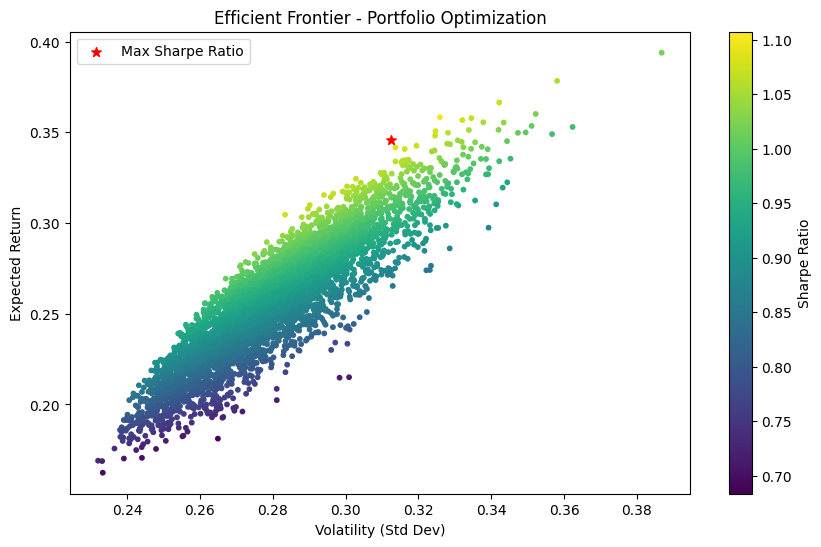

In [11]:
# --- Step 4: Efficient Frontier Plot ---
results_df = pd.DataFrame(results.T, columns=["Return", "Volatility", "Sharpe"])
plt.figure(figsize=(10,6))
plt.scatter(results_df["Volatility"], results_df["Return"], c=results_df["Sharpe"], cmap="viridis", s=10)
plt.colorbar(label="Sharpe Ratio")
plt.xlabel("Volatility (Std Dev)")
plt.ylabel("Expected Return")
plt.title("Efficient Frontier - Portfolio Optimization")

# Highlight max Sharpe portfolio
max_sharpe_idx = results_df["Sharpe"].idxmax()
plt.scatter(results_df.loc[max_sharpe_idx]["Volatility"],
            results_df.loc[max_sharpe_idx]["Return"],
            c="red", s=50, marker="*", label="Max Sharpe Ratio")
plt.legend()
plt.show()


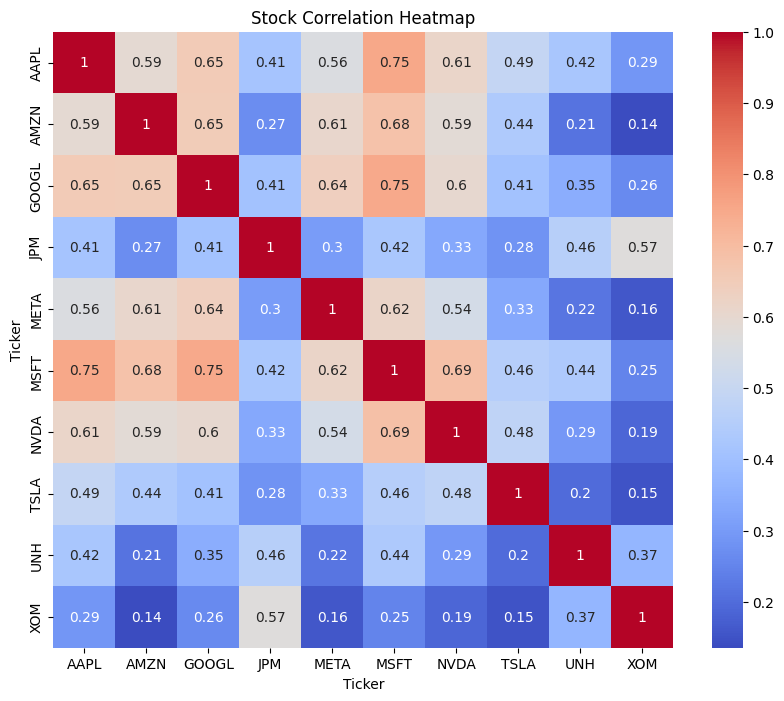

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(returns.corr(), annot=True, cmap="coolwarm")
plt.title("Stock Correlation Heatmap")
plt.show()